In [46]:
# Load the data
import os
from sklearn import preprocessing, metrics

# Parameters
do_grid_search_cv = True
do_pca = False
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the CSV file and convert "?" to NaN

original_data = pd.read_csv('C:/Users/Mirela/PycharmProjects/Covid_19/covid_19_clean_complete.csv',
                            names=['Province/State','Country/Region','Lat','Long','Date','Confirmed','Deaths','Recovered'
], sep=r'\s*,\s*',
                            engine='python',
                            na_values="?")

print(original_data.head())
print(original_data.dtypes)

print(original_data.isna().sum())
original_data = original_data.dropna()
print(original_data.head())



   Province/State  Country/Region      Lat     Long     Date  Confirmed  \
0  Province/State  Country/Region      Lat     Long     Date  Confirmed   
1             NaN     Afghanistan     33.0     65.0  1/22/20          0   
2             NaN         Albania  41.1533  20.1683  1/22/20          0   
3             NaN         Algeria  28.0339   1.6596  1/22/20          0   
4             NaN         Andorra  42.5063   1.5218  1/22/20          0   

   Deaths  Recovered  
0  Deaths  Recovered  
1       0          0  
2       0          0  
3       0          0  
4       0          0  
Province/State    object
Country/Region    object
Lat               object
Long              object
Date              object
Confirmed         object
Deaths            object
Recovered         object
dtype: object
Province/State    11832
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype

In [47]:
# Encode the categorical features as numbers
result = original_data.copy()
encoders = {}
for column in result.columns:

    if result.dtypes[column] == pd.np.object:
        encoders[column] = preprocessing.LabelEncoder()
        result[column] = encoders[column].fit_transform(result[column])

features = result
feature_names = features.columns.get_values()
print(features.head())

    Province/State  Country/Region  Lat  Long  Date  Confirmed  Deaths  \
0               54               3   77    78    68        682      83   
9                4               0    9    68     0          0       0   
10              46               0    7    70     0          0       0   
11              49               0    0    64     0          0       0   
12              57               0    5    71     0          0       0   

    Recovered  
0         605  
9           0  
10          0  
11          0  
12          0  


In [48]:
labels = np.array(features['Deaths']) # Create an array.

# Remove the labels from the features
# axis 1 refers to the columns

features = features.drop('Deaths', axis=1) #  Remove columns by specifying label names and coresponding axis

In [49]:
# data normalization
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
features = normalizer.fit_transform(features)

In [50]:
# Using Skicit-learn to split data into training and testing sets

from sklearn.model_selection import train_test_split

# Split data into random train and test subsets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2,
                                                                            random_state=42)
# returns list containing train-test split of inputs.

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (4244, 7)
Training Labels Shape: (4244,)
Testing Features Shape: (1061, 7)
Testing Labels Shape: (1061,)


In [51]:
import os
from keras import Sequential
from keras.layers import Dense, Dropout
from sklearn import preprocessing, metrics

input_dimensions = train_features.shape[1]
optimizer = 'rmsprop'
dropout = 0.05
model = Sequential()
inner_nodes = int(input_dimensions / 2)

model.add(Dense(inner_nodes, kernel_initializer='uniform', activation='relu', input_dim=input_dimensions))
model.add(Dropout(rate=dropout))
model.add(Dense(inner_nodes, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(rate=dropout))
model.add(Dense(1, kernel_initializer='uniform', activation='softmax'))

model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])#Configures the model for training

In [52]:
model.summary()

example_batch = train_features[:15]
example_result = model.predict(example_batch)#Generates output predictions for the input samples.
print(example_result)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 3)                 24        
_________________________________________________________________
dropout_9 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 12        
_________________________________________________________________
dropout_10 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [53]:
EPOCHS = 100

history = model.fit(
  train_features, train_labels,
  epochs=EPOCHS, batch_size=512, validation_split = 0.2, verbose=0)#Trains the model for a given number of epochs (iterations on a dataset)

In [54]:
# Visualize the training progress
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.tail())

     val_loss  val_mean_absolute_error  val_mean_squared_error        loss  \
95  531.58539                 9.877503              531.585388  531.551106   
96  531.58539                 9.877503              531.585388  531.551106   
97  531.58539                 9.877503              531.585388  531.551103   
98  531.58539                 9.877503              531.585388  531.551103   
99  531.58539                 9.877503              531.585388  531.551106   

    mean_absolute_error  mean_squared_error  epoch  
95             9.863328          531.551086     95  
96             9.863328          531.551086     96  
97             9.863328          531.551086     97  
98             9.863328          531.551086     98  
99             9.863328          531.551086     99  


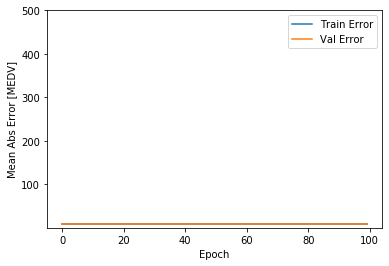

In [55]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MEDV]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
             label='Val Error')
    plt.ylim([0.5, 500])
    plt.legend()
    plt.show()


plot_history(history)

In [56]:
loss, mae, mse = model.evaluate(test_features, test_labels, batch_size=16)

print("Testing set Mean Abs Error: {:5.2f} MEDV ".format(mae))

1061/1061 [==============================] - 0s 46us/step
Testing set Mean Abs Error:  8.85 MEDV 


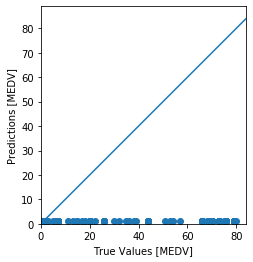

In [57]:
# Make predictions

test_predictions = model.predict(test_features).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-700, 700], [-700, 700])


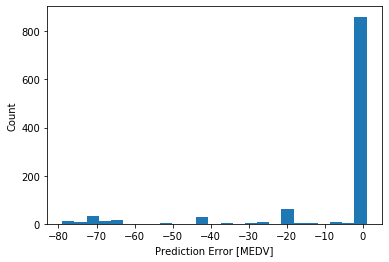

In [58]:
# error distribution
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MEDV]")
_ = plt.ylabel("Count")